<a href="https://colab.research.google.com/github/Redwoods/dle/blob/main/notebook/ch05_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ch05. Perceptron

- https://towardsdatascience.com/perceptrons-the-first-neural-network-model-8b3ee4513757

### 파이썬 코어로 구현
- AND 연산

In [1]:
epsilon = 0.0000001

def perceptron(x1, x2):
    w1, w2, b = 1.0, 1.0, -1.5
    sum = x1*w1+x2*w2+b
    if sum > epsilon :		# 부동소수점 오차를 방지하기 위하여
        return 1
    else :
        return 0
    
print(perceptron(0, 0))
print(perceptron(1, 0))
print(perceptron(0, 1))
print(perceptron(1, 1))


0
0
0
1


###  numpy로 퍼셉트론 구현
- AND 연산

In [2]:
import numpy as np
epsilon = 0.0000001

def perceptron(x1, x2):
    X = np.array([x1, x2])
    W = np.array([1.0, 1.0])
    B = -1.5
    sum = np.dot(W, X)+B
    if sum > epsilon :
        return 1
    else :
        return 0

print(perceptron(0, 0))
print(perceptron(1, 0))
print(perceptron(0, 1))
print(perceptron(1, 1))


0
0
0
1


### numpy로 펴셉트론 학습 : AND 연산
- fit()
- predict()

In [3]:
import numpy as np

epsilon = 0.0000001		# 부동소수점 오차 방지

def step_func(t):		# 퍼셉트론의 활성화 함수
    if t > epsilon: return 1
    else: return 0

X = np.array([			# 훈련 데이터 세트
    [0, 0, 1],			# 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
    [0, 1, 1],			# 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
    [1, 0, 1],			# 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
    [1, 1, 1]			# 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
])
	
y = np.array([0, 0, 0, 1])	# 정답을 저장하는 넘파이 행렬
W = np.zeros(len(X[0]))	# 가중치를 저장하는 넘파이 행렬
# len(X[0]),len(X)

# 학습
def perceptron_fit(X, Y, epochs=10):	# 퍼셉트론 학습 알고리즘 구현
    global W
    eta = 0.2	# 학습률

    for t in range(epochs):
        print("epoch=", t, "======================")
        for i in range(len(X)):
            predict = step_func(np.dot(X[i], W))
            error = Y[i] - predict		# 오차 계산
            W += eta * error * X[i]		# 가중치 업데이트
            print("현재 처리 입력=",X[i],"정답=",Y[i],"출력=",predict,"변경된 가중치=", W)
        print("================================")


# 예측 => 학습된 W를 이용
def perceptron_predict(X, Y):		
    global W
    for x in X:
         print(x[0], x[1], "->", step_func(np.dot(x, W)))

########################################
#  학습과 예측
########################################
perceptron_fit(X, y, 6)
perceptron_predict(X, y)


epoch= 0 ======================
현재 처리 입력= [0 0 1] 정답= 0 출력= 0 변경된 가중치= [0. 0. 0.]
현재 처리 입력= [0 1 1] 정답= 0 출력= 0 변경된 가중치= [0. 0. 0.]
현재 처리 입력= [1 0 1] 정답= 0 출력= 0 변경된 가중치= [0. 0. 0.]
현재 처리 입력= [1 1 1] 정답= 1 출력= 0 변경된 가중치= [0.2 0.2 0.2]
epoch= 1 ======================
현재 처리 입력= [0 0 1] 정답= 0 출력= 1 변경된 가중치= [0.2 0.2 0. ]
현재 처리 입력= [0 1 1] 정답= 0 출력= 1 변경된 가중치= [ 0.2  0.  -0.2]
현재 처리 입력= [1 0 1] 정답= 0 출력= 0 변경된 가중치= [ 0.2  0.  -0.2]
현재 처리 입력= [1 1 1] 정답= 1 출력= 0 변경된 가중치= [0.4 0.2 0. ]
epoch= 2 ======================
현재 처리 입력= [0 0 1] 정답= 0 출력= 0 변경된 가중치= [0.4 0.2 0. ]
현재 처리 입력= [0 1 1] 정답= 0 출력= 1 변경된 가중치= [ 0.4  0.  -0.2]
현재 처리 입력= [1 0 1] 정답= 0 출력= 1 변경된 가중치= [ 0.2  0.  -0.4]
현재 처리 입력= [1 1 1] 정답= 1 출력= 0 변경된 가중치= [ 0.4  0.2 -0.2]
epoch= 3 ======================
현재 처리 입력= [0 0 1] 정답= 0 출력= 0 변경된 가중치= [ 0.4  0.2 -0.2]
현재 처리 입력= [0 1 1] 정답= 0 출력= 0 변경된 가중치= [ 0.4  0.2 -0.2]
현재 처리 입력= [1 0 1] 정답= 0 출력= 1 변경된 가중치= [ 0.2  0.2 -0.4]
현재 처리 입력= [1 1 1] 정답= 1 출력= 0 변경된 가중치= [ 0.4  0.4 -0.2]
epoch=

### sklearn의 Perceptron 이용
- AND
- XOR

In [4]:
# AND
from sklearn.linear_model import Perceptron

# 논리적 AND 연산 샘플과 정답이다. 
X = [[0,0],[0,1],[1,0],[1,1]]		# 항상 2차원 배열이어야 한다. 
y = [0, 0, 0, 1]

# 퍼셉트론을 생성한다. tol는 종료 조건이다. random_state는 난수의 시드이다.
clf = Perceptron(tol=1e-3, random_state=0)

# 학습을 수행한다. 
clf.fit(X, y)

# 테스트를 수행한다. 
print(clf.predict(X))

[0 0 0 1]


In [5]:
from sklearn.linear_model import Perceptron
# XOR
# 논리적 XOR 연산 샘플과 정답이다. 
X = [[0,0],[0,1],[1,0],[1,1]]		# 항상 2차원 배열이어야 한다. 
y = [0, 1, 1, 0]

# 퍼셉트론을 생성한다. tol는 종료 조건이다. random_state는 난수의 시드이다.
clf = Perceptron(tol=1e-3, random_state=0)

# 학습을 수행한다. 
clf.fit(X, y)

# 테스트를 수행한다. 
print(clf.predict(X))

[0 0 0 0]


### Wrong result for XOR

### XOR 연산 (numpy 사용)

In [6]:
import numpy as np

epsilon = 0.0000001		# 부동소수점 오차 방지

def step_func(t):		# 퍼셉트론의 활성화 함수
    if t > epsilon: return 1
    else: return 0
    
# XOR 연산 학습 데이터 세트
X = np.array([			# 훈련 데이터 세트
    [0, 0, 1],			# 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
    [0, 1, 1],			# 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
    [1, 0, 1],			# 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
    [1, 1, 1]			# 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
])

y = np.array([0, 1, 1, 0])
W = np.zeros(len(X[0]))	# 가중치를 저장하는 넘파이 행렬

def perceptron_fit(X, Y, epochs=10):	# 퍼셉트론 학습 알고리즘 구현
    global W
    eta = 0.2				# 학습률

    for t in range(epochs):
        print("epoch=", t, "======================")
        for i in range(len(X)):
            predict = step_func(np.dot(X[i], W))
            error = Y[i] - predict		# 오차 계산
            W += eta * error * X[i]		# 가중치 업데이트
            print("현재 처리 입력=",X[i],"정답=",Y[i],"출력=",predict,"변경된 가중치=", W)
        print("================================")

def perceptron_predict(X, Y):		# 예측	
    global W
    for x in X:
         print(x[0], x[1], "->", step_func(np.dot(x, W)))

perceptron_fit(X, y, 20)
perceptron_predict(X, y)
#######################################
# Perceptron doesn't solve XOR problem.
#######################################

epoch= 0 ======================
현재 처리 입력= [0 0 1] 정답= 0 출력= 0 변경된 가중치= [0. 0. 0.]
현재 처리 입력= [0 1 1] 정답= 1 출력= 0 변경된 가중치= [0.  0.2 0.2]
현재 처리 입력= [1 0 1] 정답= 1 출력= 1 변경된 가중치= [0.  0.2 0.2]
현재 처리 입력= [1 1 1] 정답= 0 출력= 1 변경된 가중치= [-0.2  0.   0. ]
epoch= 1 ======================
현재 처리 입력= [0 0 1] 정답= 0 출력= 0 변경된 가중치= [-0.2  0.   0. ]
현재 처리 입력= [0 1 1] 정답= 1 출력= 0 변경된 가중치= [-0.2  0.2  0.2]
현재 처리 입력= [1 0 1] 정답= 1 출력= 0 변경된 가중치= [0.  0.2 0.4]
현재 처리 입력= [1 1 1] 정답= 0 출력= 1 변경된 가중치= [-0.2  0.   0.2]
epoch= 2 ======================
현재 처리 입력= [0 0 1] 정답= 0 출력= 1 변경된 가중치= [-0.2  0.   0. ]
현재 처리 입력= [0 1 1] 정답= 1 출력= 0 변경된 가중치= [-0.2  0.2  0.2]
현재 처리 입력= [1 0 1] 정답= 1 출력= 0 변경된 가중치= [0.  0.2 0.4]
현재 처리 입력= [1 1 1] 정답= 0 출력= 1 변경된 가중치= [-0.2  0.   0.2]
epoch= 3 ======================
현재 처리 입력= [0 0 1] 정답= 0 출력= 1 변경된 가중치= [-0.2  0.   0. ]
현재 처리 입력= [0 1 1] 정답= 1 출력= 0 변경된 가중치= [-0.2  0.2  0.2]
현재 처리 입력= [1 0 1] 정답= 1 출력= 0 변경된 가중치= [0.  0.2 0.4]
현재 처리 입력= [1 1 1] 정답= 0 출력= 1 변경된 가중치= [-0.2  0.   0.

### 결정 경계 (Decision boundary)

In [7]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
import numpy as np

# 퍼셉트론을 생성한다. tol는 종료 조건이다. random_state는 난수의 시드이다.
clf = Perceptron(tol=1e-3, random_state=0)

# 뭉쳐진 데이터를 만든다. 샘플의 개수는 총 100개, 클러스터의 개수는 2개이다. 
X, y = make_blobs(n_samples=100, centers=2)
print(X.shape,y.shape)
print(X[:5],y[:5])


(100, 2) (100,)
[[  7.67309015 -10.53908889]
 [ -4.89961642  -3.92168293]
 [ -3.31835412  -2.96315405]
 [ -5.6071152   -1.6152725 ]
 [  5.090512   -10.34290602]] [0 1 1 1 0]


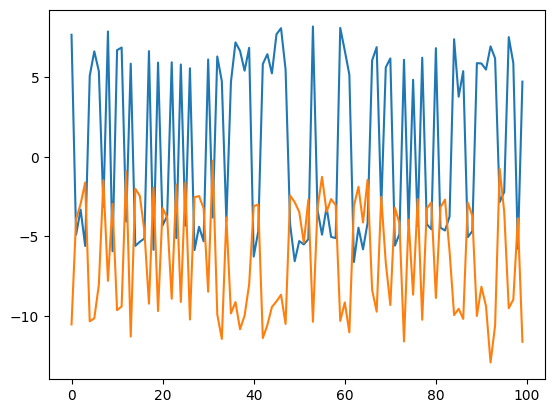

In [8]:
plt.plot(X)
plt.show()


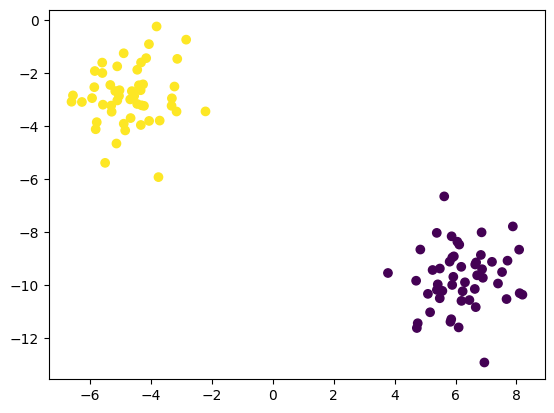

In [9]:

# plt.scatter(X[:,0],X[:,1])
# plt.show()

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()


In [10]:
# Learning
clf.fit(X, y)

#######################################
from sklearn.metrics import accuracy_score
print(accuracy_score(clf.predict(X), y))


1.0


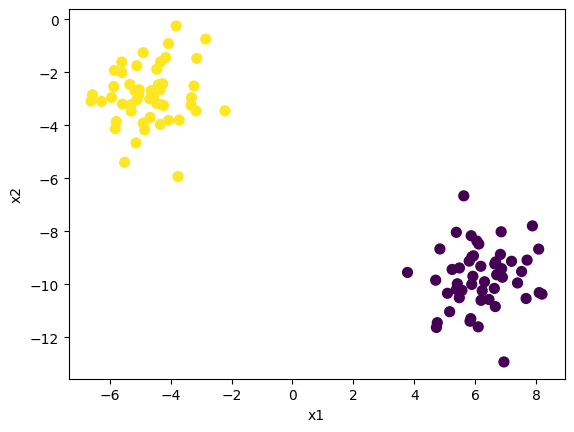

In [11]:

# 데이터를 그래프 위에 표시한다. 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


### decisoion boundary

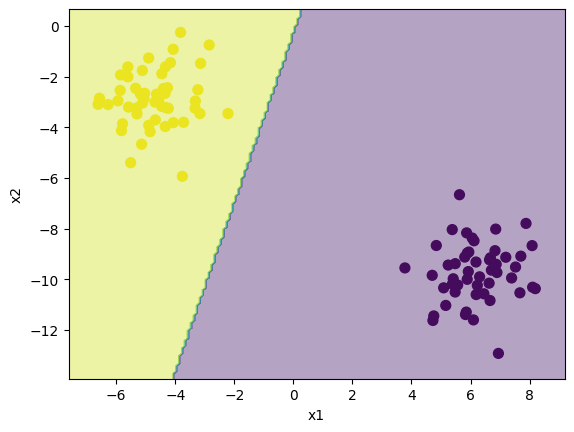

In [12]:
# 데이터를 그래프 위에 표시한다. 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.xlabel("x1")
plt.ylabel("x2")

# 데이터에서 최소 좌표와 최대 좌표를 계산한다. 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# 0.1 간격으로 메쉬 그리드 좌표를 만든다. 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
xx.shape,yy.shape
xx.ravel().shape  # , 123*91
np.c_[xx.ravel(), yy.ravel()].shape

# 메쉬 그리드 데이터에 대하여 예측을 한다. 
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z.shape
# 컨투어를 그린다. 
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

---
# [DIY] 체증과 키의 분포를 이용한 성별 예측
- Perceptron
- Decision boundary

In [19]:
# Model
from sklearn.linear_model import Perceptron

X = [[160, 55],[165, 48],[163, 43],[170, 80], [175,76], [180,70]]	# 항상 2차원 배열이어야 한다. 
y = [0, 0, 0, 1, 1, 1]

# 퍼셉트론을 생성한다. tol는 종료 조건이다. random_state는 난수의 시드이다.
# 학습이 (loss > previous_loss - tol)일 때 중지
clf = Perceptron(tol=1e-3, random_state=0)

# 학습을 수행한다. 
clf.fit(X, y)

# 테스트를 수행한다. 
print(clf.predict(X))
print(clf.coef_)	# 가중치
print(clf.intercept_)	# 바이어스 값


[0 0 0 1 1 1]
[[-59. 160.]]
[-1.]


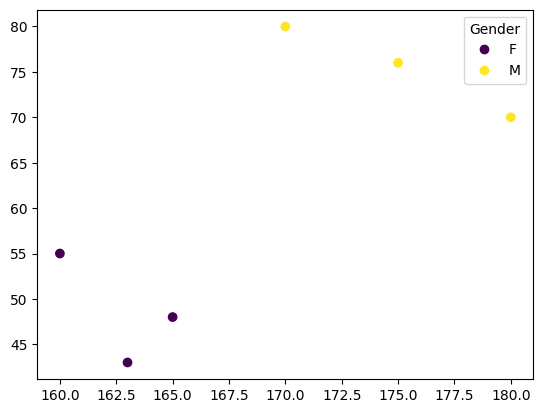

In [20]:
#   Plot model
####################################
X1=[x[0] for x in X]  # List comprehension, 리스트 내포
X2=[x[1] for x in X]  
import matplotlib.pyplot as plt
class_name = ['F','M']

scatter = plt.scatter(X1,X2,c=y)
plt.legend(handles=scatter.legend_elements()[0], 
           labels=class_name,
           title="Gender")
plt.show()


In [21]:
# Check result
import numpy as np
Y1=np.array(X)@(np.array(clf.coef_).T)+clf.intercept_

epsilon = 0.0000001
def step_func(t):		# 퍼셉트론의 활성화 함수
    if t > epsilon: return 1
    else: return 0

for i in range(len(Y1)):
    print(step_func(Y1[i]))

0
0
0
1
1
1


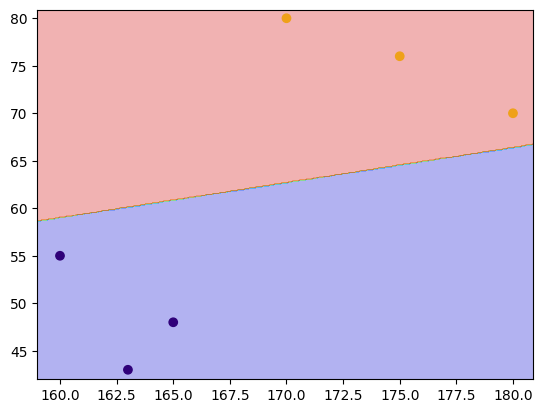

In [22]:
# Decision boundary
import matplotlib.pyplot as plt
from matplotlib import cm
X1=[x[0] for x in X]
X2=[x[1] for x in X]

plt.scatter(X1,X2,c=y)
# plt.plot(Y1)
# plt.show()
# 데이터에서 최소 좌표와 최대 좌표를 계산한다. 
x_min, x_max = np.array(X1).min() - 1, np.array(X1).max() + 1
y_min, y_max = np.array(X2).min() - 1, np.array(X2).max() + 1

# 0.1 간격으로 메쉬 그리드 좌표를 만든다. 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
# xx.shape,yy.shape
# xx.ravel().shape  # , 123*91

# 메쉬 그리드 데이터에 대하여 예측을 한다. 
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# 컨투어를 그린다. 
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cm.jet)
plt.show()

---
### Function to plot decision boundary 

In [23]:
def plot_decision_boundary(X, y, model):
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y)

    # 데이터에서 최소 좌표와 최대 좌표를 계산한다. 
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    # Plot decision boundary
    m, b = model.coef_[0], model.intercept_    
    x1 = np.linspace(x_min, x_max, 100)
    x2 = (-m[0] * x1 - b) / m[1]
#     x2 = m * x1 + b 
    plt.plot(x1, x2)

    # Set axis labels
    plt.xlabel('Height')
    plt.ylabel('Weight')

    # Show plot
    plt.show()


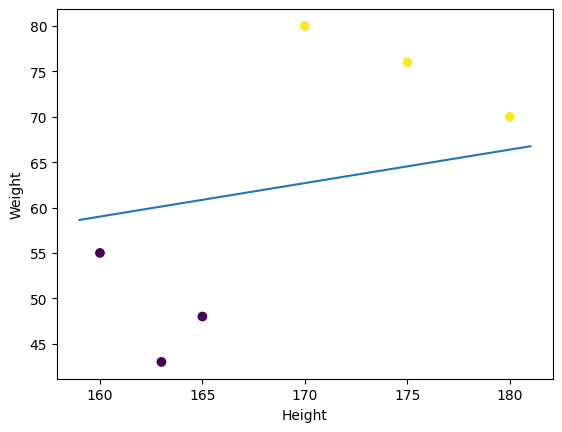

In [24]:
# Convert X and yto array
X=np.array(X)
plot_decision_boundary(X, y, model=clf)